In [32]:
# ====================================================
# Project: Hydrological Monitoring in Brisbane
# Author: Wagner Luiz Apel
# ====================================================

# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from warnings import filterwarnings
filterwarnings('ignore')

In [33]:
# 2. Loading the data
# Let's use the columns: FORMATION, LAT, LONG
df = pd.read_csv(r'../data/raw/groundwater-network.csv') 


In [34]:
df

,BASIN,SUBBASIN,BASIN NAME,SUBBASIN NAME,SITE NO,SALTWATER INTRUSION,WL FREQUENCY,PERIOD (YEARS),WQ,WQ Frequency,TEL,FORMATION,LAT,LONG
0,1,11,Georgina,Eyre Creek,146680A,No,1,3,Yes,NaN,NaN,LONGSIGHT SANDSTONE,-24.3568,140.0010
1,1,11,Georgina,Eyre Creek,93361A,No,1,3,Yes,NaN,NaN,LONGSIGHT SANDSTONE,-24.4445,139.3463
2,1,11,Georgina,Eyre Creek,51642A,No,1,3,Yes,NaN,NaN,LONGSIGHT SANDSTONE,-22.9627,140.5167
3,1,11,Georgina,Eyre Creek,13829A,No,1,3,Yes,NaN,NaN,LONGSIGHT SANDSTONE,-23.1558,140.2358
4,1,11,Georgina,Eyre Creek,13088A,No,1,3,Yes,NaN,NaN,HOORAY SANDSTONE,-25.5324,138.9879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,922,9221,Archer,Coen River,92210001A,No,2,1,NaN,NaN,Yes,GILBERT RIVER FORMATION,-13.6277,142.8056
3915,925,9250,Wenlock,Wenlock River,92500009A,No,2,1,NaN,NaN,Yes,GILBERT RIVER FORMATION,-12.6535,142.7085
3916,925,9250,Wenlock,Wenlock River,72262A,No,1,3,Yes,NaN,NaN,GARRAWAY SANDSTONE,-12.7851,142.4047
3917,926,9260,Ducie,Ducie River,92600003A,No,2,1,NaN,NaN,Yes,NaN,-12.2085,142.5827


In [35]:
print(df)

      BASIN  SUBBASIN BASIN NAME  SUBBASIN NAME    SITE NO  \
0         1        11   Georgina     Eyre Creek    146680A   
1         1        11   Georgina     Eyre Creek     93361A   
2         1        11   Georgina     Eyre Creek     51642A   
3         1        11   Georgina     Eyre Creek     13829A   
4         1        11   Georgina     Eyre Creek     13088A   
...     ...       ...        ...            ...        ...   
3914    922      9221     Archer     Coen River  92210001A   
3915    925      9250    Wenlock  Wenlock River  92500009A   
3916    925      9250    Wenlock  Wenlock River     72262A   
3917    926      9260      Ducie    Ducie River  92600003A   
3918    926      9260      Ducie    Ducie River  92600002A   

     SALTWATER INTRUSION  WL FREQUENCY  PERIOD (YEARS)   WQ  WQ Frequency  \
0                     No             1               3  Yes           NaN   
1                     No             1               3  Yes           NaN   
2                     No

In [36]:
# checking null values
df.isnull().sum()

BASIN                     0
SUBBASIN                  0
BASIN NAME                0
SUBBASIN NAME             2
SITE NO                   0
SALTWATER INTRUSION       0
WL FREQUENCY              0
PERIOD (YEARS)            0
WQ                     3169
WQ Frequency           3919
TEL                    3568
FORMATION              2236
LAT                       0
LONG                      0
dtype: int64

In [37]:
# computing % of missing values
df.isnull().sum()/len(df)*100

BASIN                    0.000000
SUBBASIN                 0.000000
BASIN NAME               0.000000
SUBBASIN NAME            0.051033
SITE NO                  0.000000
SALTWATER INTRUSION      0.000000
WL FREQUENCY             0.000000
PERIOD (YEARS)           0.000000
WQ                      80.862465
WQ Frequency           100.000000
TEL                     91.043634
FORMATION               57.055371
LAT                      0.000000
LONG                     0.000000
dtype: float64

In [38]:
# check duplicated values and consider this is a filter
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3914    False
3915    False
3916    False
3917    False
3918    False
Length: 3919, dtype: bool

In [39]:
#filtering, check if all these rows are duplicated with each other
df[df.duplicated()].sum()/len(df)*100

BASIN                  0.0
SUBBASIN               0.0
BASIN NAME             0.0
SUBBASIN NAME          0.0
SITE NO                0.0
SALTWATER INTRUSION    0.0
WL FREQUENCY           0.0
PERIOD (YEARS)         0.0
WQ                     0.0
WQ Frequency           0.0
TEL                    0.0
FORMATION              0.0
LAT                    0.0
LONG                   0.0
dtype: object

In [40]:
df.columns

Index(['BASIN', 'SUBBASIN', 'BASIN NAME', 'SUBBASIN NAME', 'SITE NO',
       'SALTWATER INTRUSION', 'WL FREQUENCY', 'PERIOD (YEARS)', 'WQ',
       'WQ Frequency', 'TEL', 'FORMATION', 'LAT', 'LONG'],
      dtype='object')

In [41]:
df = df[["BASIN NAME", "FORMATION", "LAT", "LONG"]]
print(df)

     BASIN NAME                FORMATION      LAT      LONG
0      Georgina      LONGSIGHT SANDSTONE -24.3568  140.0010
1      Georgina      LONGSIGHT SANDSTONE -24.4445  139.3463
2      Georgina      LONGSIGHT SANDSTONE -22.9627  140.5167
3      Georgina      LONGSIGHT SANDSTONE -23.1558  140.2358
4      Georgina         HOORAY SANDSTONE -25.5324  138.9879
...         ...                      ...      ...       ...
3914     Archer  GILBERT RIVER FORMATION -13.6277  142.8056
3915    Wenlock  GILBERT RIVER FORMATION -12.6535  142.7085
3916    Wenlock       GARRAWAY SANDSTONE -12.7851  142.4047
3917      Ducie                      NaN -12.2085  142.5827
3918      Ducie               HELBY BEDS -11.7493  142.5824

[3919 rows x 4 columns]


In [42]:
# 3. Basic Statistics
print("\nData summary:")
print(df.describe())


Data summary:
               LAT         LONG
count  3919.000000  3919.000000
mean    -23.342257   149.590232
std       3.639628     2.740086
min     -29.130100   138.951200
25%     -27.171150   147.369600
50%     -24.493600   149.750300
75%     -19.817450   152.255750
max     -11.749300   153.509200


In [43]:
print("\nUnique monitored formations:")
print(df['FORMATION'].nunique())


Unique monitored formations:
178


In [44]:
print("\nBasin Name:")
print(df['BASIN NAME'].nunique())


Basin Name:
53


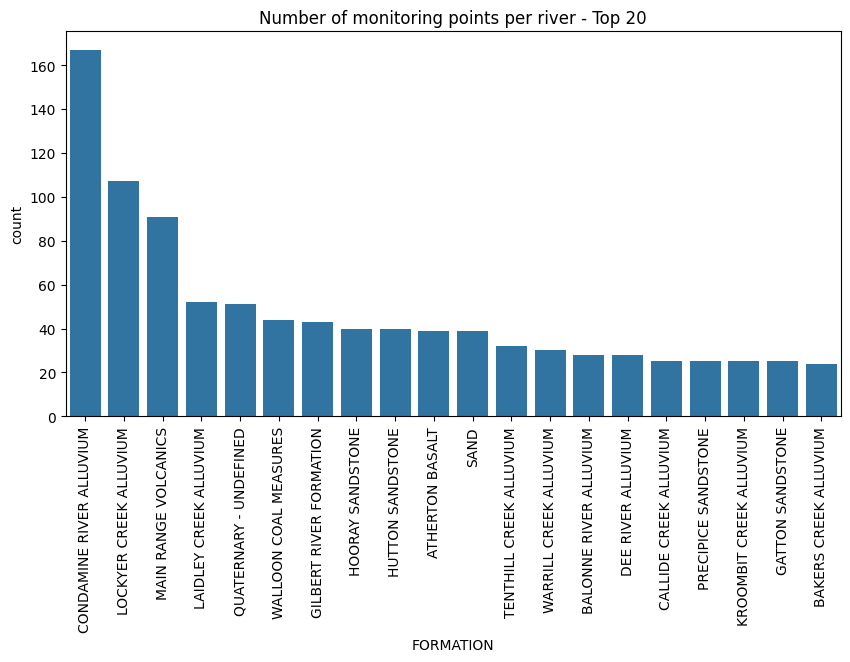

In [45]:
# 4. Point count by formation
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="FORMATION", order=df['FORMATION'].value_counts().nlargest(20).index)
plt.xticks(rotation=90)
plt.title("Number of monitoring points per river - Top 20")
plt.show()

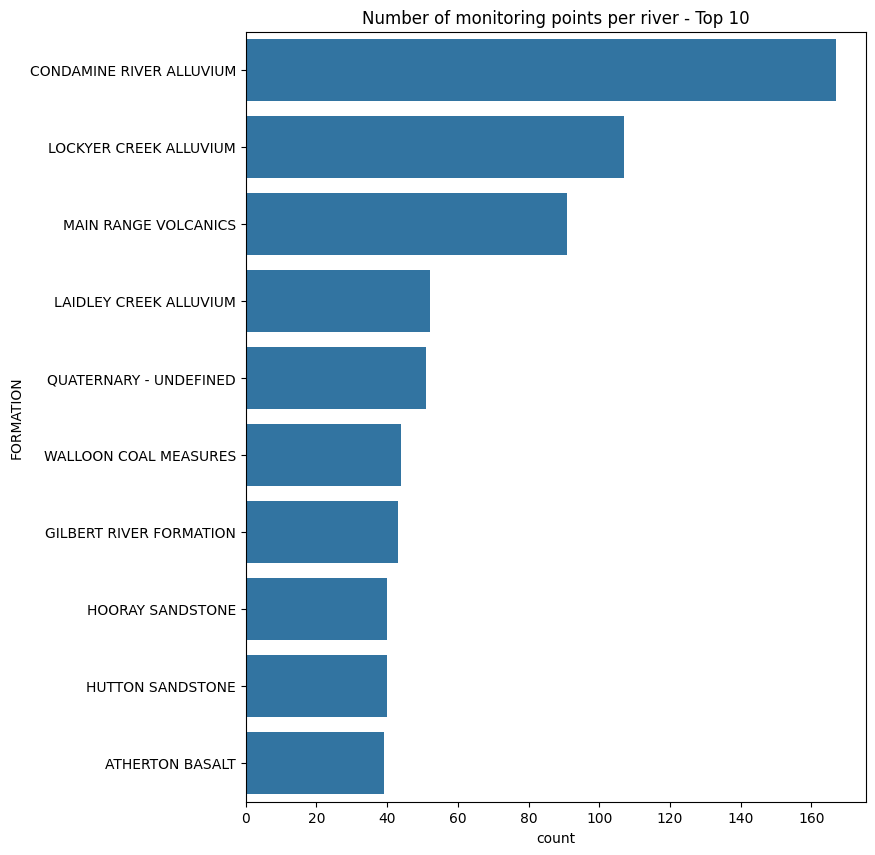

In [46]:
plt.figure(figsize=(8,10))
sns.countplot(data=df, y="FORMATION", order=df['FORMATION'].value_counts()[0:10].index)
plt.title("Number of monitoring points per river - Top 10")
plt.show()

In [26]:
# 5. Create map - Focus at Brisbane (-27.4698, 153.0251)
mapa = folium.Map(location=[-27.4698, 153.0251], zoom_start=9)

In [27]:
# 6. Group points into clusters
marker_cluster = MarkerCluster().add_to(mapa)

In [48]:
for i, row in df.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LONG']],
        popup=f"Formation: {row['FORMATION']}",
        icon=folium.Icon(color="blue", icon="tint", prefix="fa")
    ).add_to(marker_cluster)

In [49]:
# 7. Save map in HTML
mapa.save("../maps/map_hydrology_queensland.html")
print("Map saved as 'map_hydrology_queensland.html'")

Map saved as 'map_hydrology_queensland.html'


In [50]:
# 8. Export df to csv file
df.to_csv('../data/processed/groundwater_clean.csv', index = False) 